In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#### Indicators  
###### highBP = 0 No high blood pressure - 1 high blood pressure
###### cholCheck = 0 for Not checked cholesterol in past 5 years
###### bmi = these are BMI * 100. So for example a BMI of 4018 is really 40.18
###### diabetes = 0 is for no diabetes or only during pregnancy, 1 is for yes diabetes
###### general health = 1 is Excellent -> 5 is Poor
###### mental health = scale will be 0-30
###### physical health = scale will be 0-30
###### sex = male 1 - female 0
###### age = 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments
###### education = 1 being never attended school or kindergarten only up to 6 being college 4 years or more
###### income = 1 being less than 10,000 all the way up to 8 being 75,000 or more


In [3]:
df = pd.read_csv(r"C:\Users\haiss\Downloads\archive\heart_disease_health_indicators_BRFSS2015.csv")
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['heartdiseaseorattack', 'highbp', 'highchol', 'cholcheck', 'bmi',
       'smoker', 'stroke', 'diabetes', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
       'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education',
       'income'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', None)
df.head()


,heartdiseaseorattack,highbp,highchol,cholcheck,bmi,smoker,stroke,diabetes,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
df.isna().sum().sum()

0

In [7]:
df.duplicated().sum()

23899

In [8]:
df.dtypes

heartdiseaseorattack    float64
highbp                  float64
highchol                float64
cholcheck               float64
bmi                     float64
smoker                  float64
stroke                  float64
diabetes                float64
physactivity            float64
fruits                  float64
veggies                 float64
hvyalcoholconsump       float64
anyhealthcare           float64
nodocbccost             float64
genhlth                 float64
menthlth                float64
physhlth                float64
diffwalk                float64
sex                     float64
age                     float64
education               float64
income                  float64
dtype: object

In [9]:
df.nunique()

heartdiseaseorattack     2
highbp                   2
highchol                 2
cholcheck                2
bmi                     84
smoker                   2
stroke                   2
diabetes                 3
physactivity             2
fruits                   2
veggies                  2
hvyalcoholconsump        2
anyhealthcare            2
nodocbccost              2
genhlth                  5
menthlth                31
physhlth                31
diffwalk                 2
sex                      2
age                     13
education                6
income                   8
dtype: int64

#### Let's see wich columns are most important

In [10]:
corr_matrix = df.corr()

In [11]:
sort_corr = corr_matrix.unstack().sort_values(ascending=False)
sort_corr = sort_corr[sort_corr.index.get_level_values(0) != sort_corr.index.get_level_values(1)]
print(sort_corr.head(10))
# The most important columns in DF

genhlth    physhlth     0.524364
physhlth   genhlth      0.524364
diffwalk   physhlth     0.478417
physhlth   diffwalk     0.478417
diffwalk   genhlth      0.456920
genhlth    diffwalk     0.456920
education  income       0.449106
income     education    0.449106
menthlth   physhlth     0.353619
physhlth   menthlth     0.353619
dtype: float64


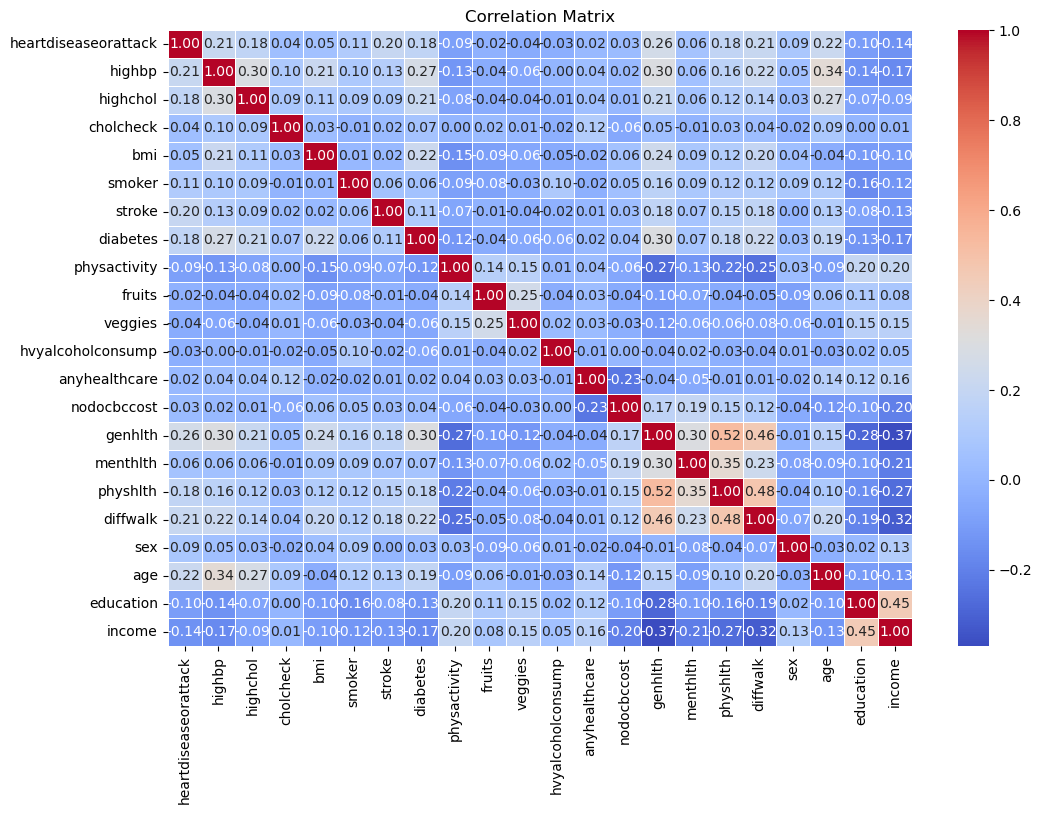

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Target Variable = Diabetes
df['diabetes'].describe()

count    253680.000000
mean          0.296921
std           0.698160
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: diabetes, dtype: float64

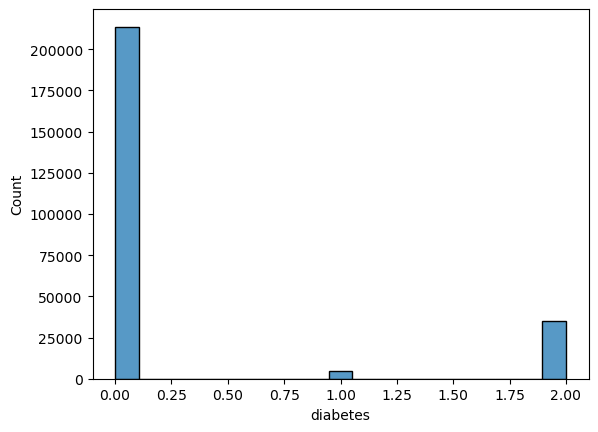

In [14]:
sns.histplot(df['diabetes'])
plt.show()

In [15]:
df.groupby('diabetes').agg({'diabetes': ['count']})


,diabetes
,count
diabetes,
0.0,213703
1.0,4631
2.0,35346


In [16]:
df_filtered = df[df['diabetes'] != 1.0]

In [17]:
df_filtered.groupby('diabetes').agg({'diabetes': ['count']})

,diabetes
,count
diabetes,
0.0,213703
2.0,35346


In [18]:
df_filtered['diabetes'] = df_filtered['diabetes'].replace(2.0, 1.0)

In [19]:
df_filtered.groupby('diabetes').agg({'diabetes': ['count']})

,diabetes
,count
diabetes,
0.0,213703
1.0,35346


In [20]:
dropped = df_filtered.loc[:, ['highbp', 'highchol', 'cholcheck', 'bmi',
       'smoker', 'diabetes', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
       'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education',
       'income']]
print(dropped)

        highbp  highchol  cholcheck   bmi  smoker  diabetes  physactivity  \
0          1.0       1.0        1.0  40.0     1.0       0.0           0.0   
1          0.0       0.0        0.0  25.0     1.0       0.0           1.0   
2          1.0       1.0        1.0  28.0     0.0       0.0           0.0   
3          1.0       0.0        1.0  27.0     0.0       0.0           1.0   
4          1.0       1.0        1.0  24.0     0.0       0.0           1.0   
...        ...       ...        ...   ...     ...       ...           ...   
253675     1.0       1.0        1.0  45.0     0.0       0.0           0.0   
253676     1.0       1.0        1.0  18.0     0.0       1.0           0.0   
253677     0.0       0.0        1.0  28.0     0.0       0.0           1.0   
253678     1.0       0.0        1.0  23.0     0.0       0.0           0.0   
253679     1.0       1.0        1.0  25.0     0.0       1.0           1.0   

        fruits  veggies  hvyalcoholconsump  anyhealthcare  nodocbccost  \
0

In [21]:
X = dropped.drop('diabetes' , axis = 1)
y = dropped['diabetes']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train

,highbp,highchol,cholcheck,bmi,smoker,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
139456,0.0,0.0,1.0,30.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,5.0,7.0
50007,0.0,0.0,0.0,29.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,4.0
58986,0.0,1.0,1.0,23.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0
231908,1.0,1.0,1.0,27.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,4.0,2.0,0.0,1.0,8.0,6.0,8.0
241604,1.0,1.0,1.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,30.0,3.0,0.0,0.0,9.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122130,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
105668,0.0,0.0,1.0,49.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,4.0,1.0,0.0,4.0,5.0,5.0
134449,0.0,0.0,1.0,30.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,4.0,3.0
149620,1.0,0.0,1.0,34.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,5.0,8.0


## Logistic Regression

In [22]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [23]:
LR.score(X_test, y_test)

0.8600883356755672

In [24]:
LR.score(X_train, y_train)

0.8604841421609223

In [25]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [26]:
pred =LR.predict(X_test)
pred

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

print(classification_report(y_test, pred))

precision:  0.5170394036208733
recall:  0.13806341532774066
f1:  0.21793289193132087
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     42777
         1.0       0.52      0.14      0.22      7033

    accuracy                           0.86     49810
   macro avg       0.70      0.56      0.57     49810
weighted avg       0.82      0.86      0.82     49810



#### Oversampling

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[41870,   907],
       [ 6062,   971]], dtype=int64)

In [28]:
# to predict the probabilities instead of a class
predicted_probabilities = LR.predict_proba(X_test)[:,1]
predicted_probabilities
# Then you need to define it by hand
custom_threshold = 0.7  # For example, use a threshold of 0.7
custom_predictions = (predicted_probabilities >= custom_threshold).astype(int)
custom_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
train = pd.concat([X_train, y_train],axis = 1)
train

,highbp,highchol,cholcheck,bmi,smoker,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,diabetes
139456,0.0,0.0,1.0,30.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,5.0,7.0,0.0
50007,0.0,0.0,0.0,29.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,4.0,0.0
58986,0.0,1.0,1.0,23.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0,0.0
231908,1.0,1.0,1.0,27.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,4.0,2.0,0.0,1.0,8.0,6.0,8.0,0.0
241604,1.0,1.0,1.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,30.0,3.0,0.0,0.0,9.0,4.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122130,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0,0.0
105668,0.0,0.0,1.0,49.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,4.0,1.0,0.0,4.0,5.0,5.0,0.0
134449,0.0,0.0,1.0,30.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,4.0,3.0,0.0
149620,1.0,0.0,1.0,34.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,5.0,8.0,1.0


In [30]:
# Separate the classes
no_diabetes = train[train['diabetes'] == 0] #   no Diabetes 
no_diabetes

,highbp,highchol,cholcheck,bmi,smoker,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,diabetes
139456,0.0,0.0,1.0,30.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,5.0,7.0,0.0
50007,0.0,0.0,0.0,29.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,4.0,0.0
58986,0.0,1.0,1.0,23.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0,0.0
231908,1.0,1.0,1.0,27.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,4.0,2.0,0.0,1.0,8.0,6.0,8.0,0.0
241604,1.0,1.0,1.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,30.0,3.0,0.0,0.0,9.0,4.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112353,0.0,1.0,1.0,28.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,5.0,0.0,0.0,0.0,8.0,6.0,5.0,0.0
122130,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0,0.0
105668,0.0,0.0,1.0,49.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,4.0,1.0,0.0,4.0,5.0,5.0,0.0
134449,0.0,0.0,1.0,30.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,4.0,3.0,0.0


In [31]:
yes_diabetes = train[train['diabetes'] == 1] #  had Diabetes 
yes_diabetes

,highbp,highchol,cholcheck,bmi,smoker,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,diabetes
161771,1.0,1.0,1.0,33.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,25.0,20.0,1.0,1.0,8.0,3.0,3.0,1.0
110728,0.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,10.0,5.0,0.0,1.0,9.0,6.0,8.0,1.0
88051,1.0,0.0,1.0,24.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,5.0,10.0,10.0,1.0,0.0,9.0,5.0,4.0,1.0
245476,1.0,0.0,1.0,32.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,15.0,25.0,1.0,1.0,8.0,6.0,2.0,1.0
178322,1.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,1.0,1.0,12.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86141,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0,1.0
133099,1.0,1.0,1.0,27.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,4.0,3.0,1.0
41948,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,1.0,0.0,13.0,5.0,3.0,1.0
128731,0.0,0.0,1.0,30.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,12.0,5.0,2.0,1.0


In [32]:
from sklearn.utils import resample

In [33]:
yes_diabetes_upsample = resample(yes_diabetes, 
                                 replace = True,
                                 n_samples = len(no_diabetes),
                                 random_state = 0)

yes_diabetes_upsample

,highbp,highchol,cholcheck,bmi,smoker,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,diabetes
596,0.0,0.0,1.0,34.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,9.0,6.0,8.0,1.0
97151,1.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,4.0,8.0,1.0
141738,1.0,1.0,1.0,28.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,5.0,1.0,1.0,12.0,6.0,3.0,1.0
90200,0.0,1.0,1.0,35.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,6.0,8.0,1.0
162353,1.0,0.0,1.0,32.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,0.0,3.0,1.0,0.0,7.0,5.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62786,1.0,1.0,1.0,32.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0,1.0
124424,1.0,1.0,1.0,22.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,2.0,1.0,0.0,13.0,4.0,5.0,1.0
194536,0.0,1.0,1.0,27.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,0.0,30.0,1.0,1.0,13.0,4.0,4.0,1.0
205219,1.0,1.0,1.0,41.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,9.0,5.0,5.0,1.0


In [34]:
train_oversample = pd.concat([yes_diabetes_upsample, no_diabetes], axis = 0)
train_oversample

,highbp,highchol,cholcheck,bmi,smoker,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,diabetes
596,0.0,0.0,1.0,34.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,9.0,6.0,8.0,1.0
97151,1.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,4.0,8.0,1.0
141738,1.0,1.0,1.0,28.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,5.0,1.0,1.0,12.0,6.0,3.0,1.0
90200,0.0,1.0,1.0,35.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,6.0,8.0,1.0
162353,1.0,0.0,1.0,32.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,0.0,3.0,1.0,0.0,7.0,5.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112353,0.0,1.0,1.0,28.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,5.0,0.0,0.0,0.0,8.0,6.0,5.0,0.0
122130,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0,0.0
105668,0.0,0.0,1.0,49.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,4.0,1.0,0.0,4.0,5.0,5.0,0.0
134449,0.0,0.0,1.0,30.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,4.0,3.0,0.0


In [36]:
y_train_over =train_oversample['diabetes']
X_train_over = train_oversample.drop('diabetes', axis = 1)

LR = LogisticRegression(max_iter = 10000)
LR.fit(X_train_over, y_train_over)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

pred = LR.predict(X_test)
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))
print(classification_report(y_test, pred))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

precision:  0.3183204316209242
recall:  0.7717901322337551
f1:  0.4507369732198464
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82     42777
         1.0       0.32      0.77      0.45      7033

    accuracy                           0.73     49810
   macro avg       0.63      0.75      0.64     49810
weighted avg       0.86      0.73      0.77     49810



array([[31153, 11624],
       [ 1605,  5428]], dtype=int64)

In [37]:
y_train_over =train_oversample['diabetes']
X_train_over = train_oversample.drop('diabetes', axis = 1)
 
LR = LogisticRegression(max_iter = 1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test)


import pickle

# Save model to a pickle file
with open('logistic_model_diabetes.pkl', 'wb') as file:
    pickle.dump(LR, file)

In [38]:
with open('logistic_model_diabetes.pkl', 'rb') as file:
    LR = pickle.load(file)

In [39]:
LR

LogisticRegression(max_iter=1000)